In [87]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

df = pd.read_csv("german.data", sep=" ", header=None,names=['checking','duration','history','purpose','credit_amt','savings','employment','installment_rste','personal_status',
                                                           'other_debtors','resident_since','property','age','other_plans','housing','credits_at_bank','job','liable_maintenance','telephone','foreign_worker','credit_risk'])

# Representing Data Assignment #

## Eploratory Data analysis ##

The first two lines of code above imported the packages you should nee and the data you will be working on. This dataset classifies people described by a set of attributes as good or bad credit risks.**You want to answer the question what makes a creditor good or bad?** The first thing you should do is explore the data. look at what the features are, what type they are and how you might use some or all of them to predict wether they will be a good or bad creditor. you may want to include distrributions or boxplots of some of the features. You can include One-hot-encoding here. Describe your finidings in a few sentences.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   checking            1000 non-null   object
 1   duration            1000 non-null   int64 
 2   history             1000 non-null   object
 3   purpose             1000 non-null   object
 4   credit_amt          1000 non-null   int64 
 5   savings             1000 non-null   object
 6   employment          1000 non-null   object
 7   installment_rste    1000 non-null   int64 
 8   personal_status     1000 non-null   object
 9   other_debtors       1000 non-null   object
 10  resident_since      1000 non-null   int64 
 11  property            1000 non-null   object
 12  age                 1000 non-null   int64 
 13  other_plans         1000 non-null   object
 14  housing             1000 non-null   object
 15  credits_at_bank     1000 non-null   int64 
 16  job                 1000 

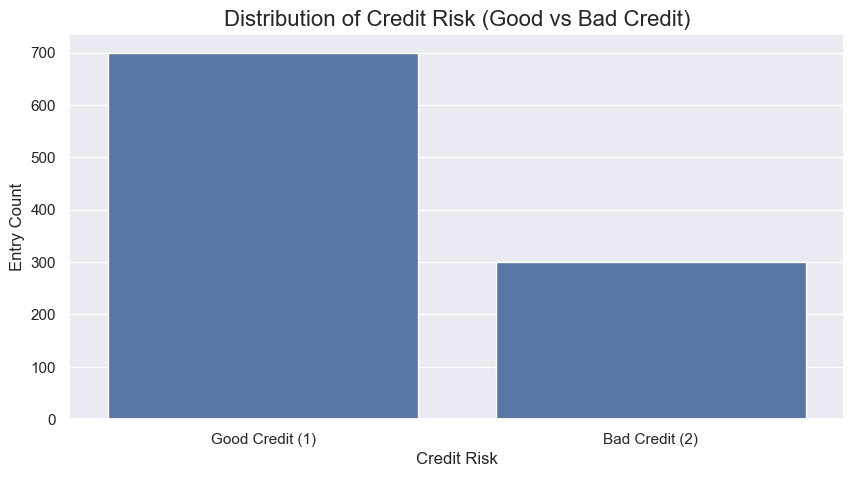

Categorical Features: ['checking', 'history', 'purpose', 'savings', 'employment', 'personal_status', 'other_debtors', 'property', 'other_plans', 'housing', 'job', 'telephone', 'foreign_worker']
Numerical Features: ['duration', 'credit_amt', 'installment_rste', 'resident_since', 'age', 'credits_at_bank', 'liable_maintenance'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   duration             1000 non-null   int64
 1   credit_amt           1000 non-null   int64
 2   installment_rste     1000 non-null   int64
 3   resident_since       1000 non-null   int64
 4   age                  1000 non-null   int64
 5   credits_at_bank      1000 non-null   int64
 6   liable_maintenance   1000 non-null   int64
 7   credit_risk          1000 non-null   int64
 8   checking_A11         1000 non-null   bool 
 9   checking_A12         1000 non-nu

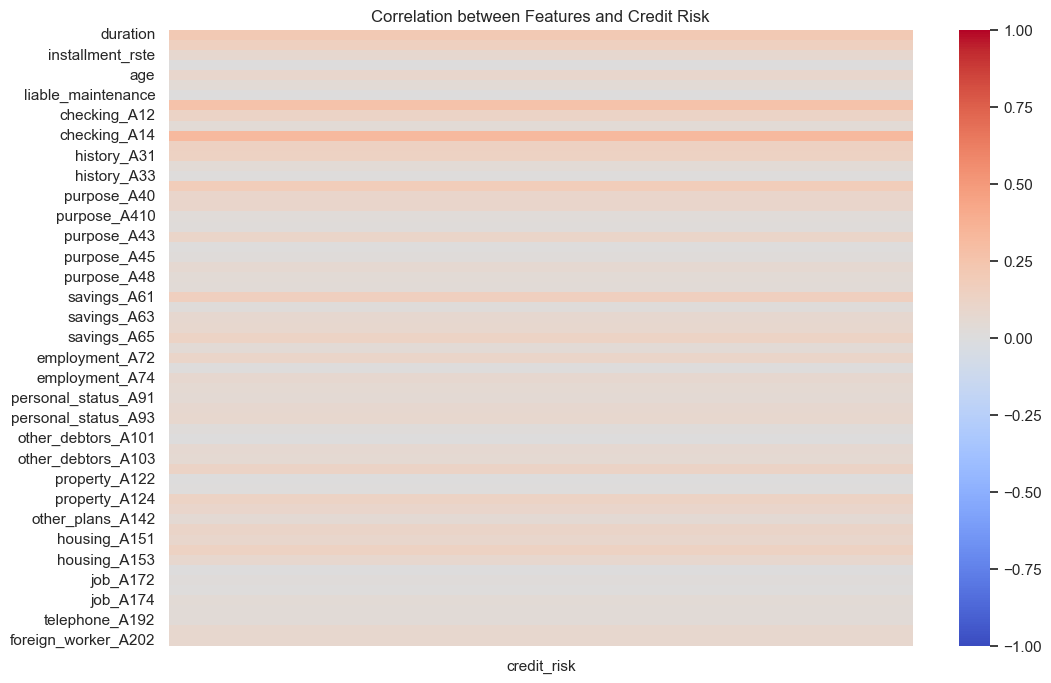

Top Features
checking_A14        0.322436
checking_A11        0.258333
duration            0.214927
history_A34         0.181713
savings_A61         0.161007
credit_amt          0.154739
history_A30         0.144767
housing_A152        0.134589
history_A31         0.134448
savings_A65         0.129238
property_A124       0.125750
checking_A12        0.119581
property_A121       0.119300
other_plans_A143    0.113285
purpose_A43         0.106922
Name: credit_risk, dtype: float64


In [88]:
df.info()
print(df)

# Plot the count of good and bad credit samples from 'credit_risk'
plt.figure(figsize=(10, 5))
sns.countplot(x='credit_risk', data=df)
plt.title('Distribution of Credit Risk (Good vs Bad Credit)', fontsize=16)
plt.xlabel('Credit Risk', fontsize=12)
plt.ylabel('Entry Count', fontsize=12)
plt.xticks([0, 1], ['Good Credit (1)', 'Bad Credit (2)'])
plt.show()

# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Check and remove the target column 'credit_risk' from numerical features
if ('credit_risk' in numerical_features):
    numerical_features.remove('credit_risk')

target = df['credit_risk']  # Save the target variable in a separate variable

# Print the lists
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features, "\n")

# One-hot encoding for categorical features
encoded_df = pd.get_dummies(df, columns=categorical_features)
encoded_df.info()

# Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = encoded_df.corr().abs()  # Correlate the data (absolute value used to consider strong negative correlations as well)
correlation_matrix = correlation_matrix.drop('credit_risk')  # Remove target to prevent unwanted self-correlation
sns.heatmap(correlation_matrix[['credit_risk']], annot=False, cmap='coolwarm', vmin=-1, vmax=1)  # Generate heatmap
plt.title('Correlation between Features and Credit Risk')
plt.show()

# Display the top 5 correlated features with credit risk
correlations = correlation_matrix['credit_risk'].sort_values(ascending=False)
print("Top Features")
print(correlations.head(15))

top_feature = correlations[:15].index.tolist()  # Store the top ten features based on correlation to target

TO DO: Finidings

In the above code segment, I printed the structure of both the data frame and the one hot encoded data frame. I also printed data frame info get understand the data types present in the data (numerical and categorical). I decided to make a graph to show the target data, which is a binomial feature that identifies the individual as someone with good credit (1) or bad credit (2). With this, I was able to note that there are much more samples with good credit, meaning I need to take into account that guessing good credit at all times will yield a fair accuracy. So if my model is truely learning the data, it must generalize the data enough to perform better than always guessing good credit for an entry. I also printed a heatmap which helps visualize the correlation of the features to the target. It highlighted that in general, none of the features correlated very strongly, yet there are a fair amount of features with weak to moderate correlations. Finally, I identified the top 10 features using the correlation done with the one-hot encoded data (using both numerical and categorical correlations) and I saved these features in a list for future use.

## Baseline Model ##

Now based on your exploration you should have noted that some features are categorical and some are numerical. As we have learned building a model only makes sense if the data is represented in a numerical way. Therfore, to get a baseline create a classification model of your choosing (ie. knn, logistic, SVM, decision tree, etc.) and split the data into training and testing sets using only numeric features. Report the accuracy of your model on the test set.

In [89]:
# KNN (K-Nearest Neighbors) Algorithm to fit the classifier to the training data
# and target labels and return the predictions for the test data
def knnClassifier(attributeTrain, attributeTest, targetTrain):
    # Instantiate a KNeighborsClassifier object with 3 neighbors, optimal for data set
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(attributeTrain, targetTrain)  # Fit the classifier to the training data and target labels

    return knn.predict(attributeTest)  # Return the predictions for the test data


# MLP (Multi-Layer Perceptron) Algorithm to fit the classifier to the training data
# and target labels and return the predictions for the test data
def mlpClassifier(attributeTrain, attributeTest, targetTrain):
    # Instantiate an MLPClassifier object with optimized parameters
    mlp = MLPClassifier(hidden_layer_sizes=100, activation='tanh', solver='adam', alpha=1e-5, batch_size=36, tol=1e-6,
                        learning_rate_init=0.01, learning_rate='constant', max_iter=10000, random_state=7)
    mlp.fit(attributeTrain, targetTrain)  # Fit the classifier to the training data and target labels

    return mlp.predict(attributeTest)  # Return the predictions for the test data


# RF (Random Forest) Algorithm to fit the classifier to the training data and target
# labels and return the predictions for the test data
def rfClassifier(attributeTrain, attributeTest, targetTrain):
    # Instantiate an RFClassifier object with optimized parameters
    rf = RandomForestClassifier(n_estimators=315, criterion='gini', max_depth=14, min_samples_split=3,
                                min_samples_leaf=3, max_features='sqrt', random_state=7)
    rf.fit(attributeTrain, targetTrain)  # Fit the classifier to the training data and target labels

    return rf.predict(attributeTest)  # Return the predictions for the test data


# SVC (Support Vector Classifier) Algorithm to fit the classifier to the training
# data and target labels and return the predictions for the test data
def svcClassifier(attributeTrain, attributeTest, targetTrain):
    # Instantiate an SVCClassifier object with optimized parameters
    svc = SVC(kernel='rbf', C=13, gamma='scale', probability=True, random_state=7)
    svc.fit(attributeTrain, targetTrain)  # Fit the classifier to the training data and target labels

    return svc.predict(attributeTest)  # Return the predictions for the test data


# Logistic Regression Algorithm to fit the classifier to the training data and target
# labels and return the predictions for the test data
def logRegClassifier(attributeTrain, attributeTest, targetTrain):
    # Instantiate an LogisticRegressionClassifier object with optimized parameters
    logReg = LogisticRegression(solver='liblinear', random_state=7)
    logReg.fit(attributeTrain, targetTrain)  # Fit the classifier to the training data and target labels

    return logReg.predict(attributeTest)  # Return the predictions for the test data


# Pipelined Logistic Regression and polynomial feature transformation Algorithm to fit the
# classifier to the training data and target labels and return predictions
def pipelineClassifier(attributeTrain, attributeTest, targetTrain):
    # Note: Increasing polynomial features count improves accuracy but significantly decreases performance
    # Instantiate a PiplinedClassifier object to combine polynomial feature transformation with
    # logistic regression with optimized parameters
    pipeline = make_pipeline(PolynomialFeatures(2), LogisticRegression(solver='liblinear', random_state=7))
    pipeline.fit(attributeTrain, targetTrain)  # Fit the classifier to the training data and target labels

    return pipeline.predict(attributeTest)  # Return the predictions for the test data


# Voting Algorithm to fit the classifier to the training data and target labels and return the predictions
# Uses all the other classifiers and uses a weighted average of predicted probabilities for create a prediction
def votingClassifier(attributeTrain, attributeTest, targetTrain):
    # All Classifiers for voting
    knn = KNeighborsClassifier(n_neighbors=3)
    mlp = MLPClassifier(hidden_layer_sizes=100, activation='tanh', solver='adam', alpha=1e-5, batch_size=36, tol=1e-6,
                        learning_rate_init=0.01, learning_rate='constant', max_iter=10000, random_state=7)
    rf = RandomForestClassifier(n_estimators=315, criterion='gini', max_depth=14, min_samples_split=3,
                                min_samples_leaf=3, max_features='sqrt', random_state=7)
    svc = SVC(kernel='rbf', C=13, gamma='scale', probability=True, random_state=7)
    pipeline = make_pipeline(PolynomialFeatures(2), LogisticRegression(solver='liblinear', random_state=7))

    # Create a voting ensemble of the classifiers with soft voting. Weighted average of predicted probabilities
    votingSystem = VotingClassifier(
        estimators=[('mlp', mlp), ('knn', knn), ('svc', svc), ('rf', rf), ('pipeline', pipeline)], voting='soft')
    votingSystem.fit(attributeTrain, targetTrain)  # Fit the classifier to the training data and target labels

    return votingSystem.predict(attributeTest)  # Return the predictions for the test data


# Print the confusion matrix, classification report, accuracy score, heatmap, and matrix display
def printResults(targetTest, prediction):
    confusionMatrix = confusion_matrix(targetTest, prediction)  # Create confusion matrix

    # Display the confusion matrix, a classification report, and the overall accuracy score of the prediction
    print("\nConfusion Matrix:\n", confusionMatrix)
    print("\nClassification Report:\n", classification_report(targetTest, prediction))
    print("Accuracy Score:", accuracy_score(targetTest, prediction))

    # Display a heatmap / confusion matrix using matplotlib and the sklearn toolset
    matrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
    fig, ax = plt.subplots(figsize=(10, 8))  # Create layout and structure figure
    matrixDisplay.plot(ax=ax, cmap='Blues')  # Create Plot
    # Plot labels
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Voting Confusion Matrix')
    # plt.savefig('confusion_matrix.png')  # Save plot as png
    plt.show()  # Display plot

    # Display Heatmap using Seaborn
    # sb.heatmap(confusionMatrix, annot = False, fmt = 'd', cmap = 'Blues', cbar = False)  # Create heatmap with Seaborn
    # plt.savefig('heatmap.png')  # Save plot as png
    # plt.show()  # Display plot


# Evaluate the classifies by using the classification models and printing the accuracies
def evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test):
    accuracies = []

    # Iterate over each classifier, get predictions and calculate accuracy
    for name, classifier in classifiers:
        prediction = classifier(X_train, X_test, y_train)
        accuracy = accuracy_score(y_test, prediction)
        accuracies.append((name, accuracy))  # Store name and accuracy

    # Print all accuracy scores
    for name, accuracy in accuracies:
        print(f"{name} Accuracy Score: {accuracy:.4f}")

    # Calculate and print the average accuracy
    average_accuracy = sum(accuracy for _, accuracy in accuracies) / len(accuracies)
    print(f"Average Accuracy Score: {average_accuracy:.4f}")

    return accuracies, average_accuracy

    
# List of tuples containing classifier names and functions
classifiers = [
    ("KNN", knnClassifier),
    ("MLP", mlpClassifier),
    ("Random Forest", rfClassifier),
    ("SVC", svcClassifier),
    ("Logistic Regression", logRegClassifier),
    ("Pipeline", pipelineClassifier),
    ("Voting", votingClassifier)
]

# Get numerical data and split it into training and testing sets
numerical_data = df.select_dtypes(include=['number'])
X_train_numerical, X_test_numerical, y_train_numerical, y_test_numerical = train_test_split(numerical_data, target, test_size=0.25, random_state=7)

evaluate_classifiers(classifiers, X_train_numerical, X_test_numerical, y_train_numerical, y_test_numerical)

KNN Accuracy Score: 0.6200
MLP Accuracy Score: 0.7400
Random Forest Accuracy Score: 1.0000
SVC Accuracy Score: 0.7360
Logistic Regression Accuracy Score: 1.0000
Pipeline Accuracy Score: 1.0000
Voting Accuracy Score: 0.9320
Average Accuracy Score: 0.8611


([('KNN', 0.62),
  ('MLP', 0.74),
  ('Random Forest', 1.0),
  ('SVC', 0.736),
  ('Logistic Regression', 1.0),
  ('Pipeline', 1.0),
  ('Voting', 0.932)],
 0.8611428571428572)

To Do: accuracy

Code segment accuracy output:
KNN Accuracy Score: 0.6200
MLP Accuracy Score: 0.7400
Random Forest Accuracy Score: 1.0000
SVC Accuracy Score: 0.7360
Logistic Regression Accuracy Score: 1.0000
Pipeline Accuracy Score: 1.0000
Voting Accuracy Score: 0.9320
Average Accuracy Score: 0.8611

Note: I transfered the functions in this code segment from an extensive machine learning project I completed in COSC311. Minor adjustments were made as needed. The evaluate_classifiers function was not transfered.

Overall, the average accuracy is fairly good as it is higher than 70% which is the accuracy if the model were to guess good credit for each classification. It is important to note here that the classification method greatly influences the accuracy of the model. Logistic regression, Random Forest, and the Pipelined classifer all classified the data perfectly, while KNN performed worse than 70% and the rest were bairly higher than 70%. 


## One-hot encoding ##

Now that we have a baseline for only the muneric data lets start thinking about the categorical data. Convert the categorical features into a numerical format and train your model using these features. Again report the accuracy  of this model and describe any differences that may occur in the two models.

In [90]:

# Use entire df with one-hot encoding converted data and split it into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(encoded_df, target, test_size=0.25, random_state=7)

print("Numerical & Categorical Data")
evaluate_classifiers(classifiers, X_train_all, X_test_all, y_train_all, y_test_all)

# Get a categoircal data only data frame represented with one-hot encoder
categorical_data = df[categorical_features]
encoded_categorical_data = pd.get_dummies(categorical_data)
# Use categorical features only one-hot encoding converted data and split it into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_categorical_data, target, test_size=0.25, random_state=7)

print("\nCategorical Data Only")
evaluate_classifiers(classifiers, X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded)

Numerical & Categorical Data
KNN Accuracy Score: 0.6200
MLP Accuracy Score: 0.7400
Random Forest Accuracy Score: 1.0000
SVC Accuracy Score: 0.7360
Logistic Regression Accuracy Score: 1.0000
Pipeline Accuracy Score: 1.0000
Voting Accuracy Score: 0.9520
Average Accuracy Score: 0.8640

Categorical Data Only
KNN Accuracy Score: 0.7320
MLP Accuracy Score: 0.7200
Random Forest Accuracy Score: 0.8000
SVC Accuracy Score: 0.7760
Logistic Regression Accuracy Score: 0.7640
Pipeline Accuracy Score: 0.7800
Voting Accuracy Score: 0.7880
Average Accuracy Score: 0.7657


([('KNN', 0.732),
  ('MLP', 0.72),
  ('Random Forest', 0.8),
  ('SVC', 0.776),
  ('Logistic Regression', 0.764),
  ('Pipeline', 0.78),
  ('Voting', 0.788)],
 0.7657142857142858)

To Do: accuracy and comparison

Code segment accuracy output:
Numerical & Categorical Data
KNN Accuracy Score: 0.6200
MLP Accuracy Score: 0.7400
Random Forest Accuracy Score: 1.0000
SVC Accuracy Score: 0.7360
Logistic Regression Accuracy Score: 1.0000
Pipeline Accuracy Score: 1.0000
Voting Accuracy Score: 0.9520
Average Accuracy Score: 0.8640

Categorical Data Only
KNN Accuracy Score: 0.7320
MLP Accuracy Score: 0.7200
Random Forest Accuracy Score: 0.8000
SVC Accuracy Score: 0.7760
Logistic Regression Accuracy Score: 0.7640
Pipeline Accuracy Score: 0.7800
Voting Accuracy Score: 0.7880
Average Accuracy Score: 0.7657

In comparison to the testing done with the numerical data only, the full data set (includes categorical) using one-hot encoder is not noticably different, at least in terms of accuracy. None of the models changed accuracy score except for the voting algorithm in which we see about a 2% accuracy increase, and of course, this increases the average slightly. However, when only using the categorical data, most of the models appear to perform worse or close to the same as when using all features. Overall, the average accuracy is 10% lower when using categorical data compared to using all the data and numerical data only. We can infer from this that the categorical data in general, using all categorical data to classify, is not very useful in influencing a classification. This tells use that the categorical data in its current form is redundant when used with the numerical data. Although, the top feature list says otherwise as a majority of the features are categorical, meaning that the features may need manipulated to better fit our model. Also, erhaps data analysis beyond accuracy comparison may be necessary, but my next step will be to manipulate the features to improve model performance.



## Feature interactions, Transformations, and Selection ##

The next steps will be to possibly reduce the number of features, transform some features, and possibly create new features. Use what we have discussed in class and your exploratory analysis of the data to develop a model that increases your accuracy by 2-5%. It is okay if you are not able to obtain that much of an increase as most of the will be based on your process and analysis. You should try to explain what your finidings are and why you tried something along the way.

In [91]:
# Get a reduced data frame using the top 15 features determined by correlation strength
reduced_data = encoded_df[top_feature]

# Use the reduced data wth only the top features and split it into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(reduced_data, target, test_size=0.25, random_state=7)

print("\nTop 15 Features from Correlation Analysis")
evaluate_classifiers(classifiers, X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced)

# Transform Features
log_transform_data = sqrt_transform_data = encoded_df

# Apply log transformation to positively skewed features
log_transform_data['credit_amt'] = log_transform_data['credit_amt'].apply(lambda x: np.log(x) if x > 0 else 0)
log_transform_data['duration'] = log_transform_data['duration'].apply(lambda x: np.log(x) if x > 0 else 0)

# Use the log transformation wth only the top features and split it into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(log_transform_data, target, test_size=0.25, random_state=7)

# Apply square root transformation to reduce skewness
sqrt_transform_data['sqrt_credit_amt'] = np.sqrt(sqrt_transform_data['credit_amt'])
sqrt_transform_data['sqrt_duration'] = np.sqrt(sqrt_transform_data['duration'])

# Use the sqrt transformation data wth only the top features and split it into training and testing sets
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(sqrt_transform_data, target, test_size=0.25, random_state=7)

print("\nFeature Transformation: Log")
evaluate_classifiers(classifiers, X_train_log, X_test_log, y_train_log, y_test_log)

print("\nFeature Transformation: Sqrt")
evaluate_classifiers(classifiers, X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt)

# Scale features
standard_scale__data = minmax_scale_data = encoded_df

# Apply standard scaler, mean = 0 | std = 1
scaler = StandardScaler()
standard_scale__data[numerical_features] = scaler.fit_transform(standard_scale__data[numerical_features])

# Use the standard scaler data wth only the top features and split it into training and testing sets
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(standard_scale__data, target, test_size=0.25, random_state=7)

# Apply min-max scaler, between 0 and 1
scaler = MinMaxScaler()
minmax_scale_data[numerical_features] = scaler.fit_transform(minmax_scale_data[numerical_features])

# Use the min-max scaler data wth only the top features and split it into training and testing sets
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(minmax_scale_data, target, test_size=0.25, random_state=7)

print("\nFeature Scaling: Standard")
evaluate_classifiers(classifiers, X_train_standard, X_test_standard, y_train_standard, y_test_standard)

print("\nFeature Scaling: MinMax")
evaluate_classifiers(classifiers, X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax)

# PCA feature reduction
pca_reduced_data = encoded_df
pca_reduced_data[numerical_features] = scaler.fit_transform(pca_reduced_data[numerical_features])

# PCA feature reduction using the scaled data
pca = PCA(n_components=10)
pca_reduced_data = pca.fit_transform(pca_reduced_data)

# Use the min-max scaler data wth only the top features and split it into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_reduced_data, target, test_size=0.25, random_state=7)

print("\nFeature Reduction: PCA")
evaluate_classifiers(classifiers, X_train_pca, X_test_pca, y_train_pca, y_test_pca)

# Feature Creation
create_data = encoded_df

# Replace 0 with a very small value to prevent divison by 0
create_data['duration'] = create_data['duration'].replace(0, 1e-6) 
create_data['credit_amt'] = create_data['credit_amt'].replace(0, 1e-6)

create_data['amt_duration_ratio'] = create_data['credit_amt'] / create_data['duration']  # Ratio of credit amount to duration
create_data['age_credit_ratio'] = create_data['age'] / create_data['credit_amt']  # Ratio of age to credit amount

# Use the min-max scaler data wth only the top features and split it into training and testing sets
X_train_create, X_test_create, y_train_create, y_test_create = train_test_split(create_data, target, test_size=0.25, random_state=7)

print("\nFeature Creation: amt_duration_ratio & age_credit_ratio")
evaluate_classifiers(classifiers, X_train_create, X_test_create, y_train_create, y_test_create)





Top 15 Features from Correlation Analysis
KNN Accuracy Score: 0.6680
MLP Accuracy Score: 0.7400
Random Forest Accuracy Score: 0.7640
SVC Accuracy Score: 0.7360
Logistic Regression Accuracy Score: 0.7760
Pipeline Accuracy Score: 0.7920
Voting Accuracy Score: 0.7640
Average Accuracy Score: 0.7486

Feature Transformation: Log
KNN Accuracy Score: 0.7920
MLP Accuracy Score: 1.0000
Random Forest Accuracy Score: 1.0000
SVC Accuracy Score: 0.9960
Logistic Regression Accuracy Score: 1.0000
Pipeline Accuracy Score: 1.0000
Voting Accuracy Score: 1.0000
Average Accuracy Score: 0.9697

Feature Transformation: Sqrt
KNN Accuracy Score: 0.7920
MLP Accuracy Score: 1.0000
Random Forest Accuracy Score: 1.0000
SVC Accuracy Score: 0.9960
Logistic Regression Accuracy Score: 1.0000
Pipeline Accuracy Score: 1.0000
Voting Accuracy Score: 1.0000
Average Accuracy Score: 0.9697

Feature Scaling: Standard
KNN Accuracy Score: 0.8360
MLP Accuracy Score: 1.0000
Random Forest Accuracy Score: 1.0000
SVC Accuracy Score

([('KNN', 0.876),
  ('MLP', 1.0),
  ('Random Forest', 1.0),
  ('SVC', 0.74),
  ('Logistic Regression', 1.0),
  ('Pipeline', 0.74),
  ('Voting', 0.992)],
 0.9068571428571428)

To Do: Analysis

## Reflection ##

The last part is to reflect on your work. What worked, what did not. What features seemed super important which ones did not. Was there anything that you thought this will work but did not change the model much.